<a href="https://colab.research.google.com/github/Jorgemontanez25/4GeeksAcademy/blob/master/Jorge_Montanez_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load csv
df = pd.read_csv('/content/drive/MyDrive/Data, AI and Machine Learning UT/Foodhub project 1/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# shape of the DataFrame
df.shape

(1898, 9)

#### Observations:
The DataFrame contains 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# DataFrame datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We have a DataFrame with 9 columns and 3 different dtypes (int, float, object), consisting of 5 numerical variables ('order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time') and 4 categorical variables ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'). Note that 'rating' is supposed to be a numerical variable, but it appears to have some values that are affecting its dtype.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df_rating_Notgiven=df['rating'].value_counts()
df_rating_Notgiven

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


In [ ]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


In [ ]:
missing_percentage = df.groupby('restaurant_name')['rating'].apply(
    lambda x: (x == "Not given").mean() * 100
)

missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)


restaurant_name
12 Chairs            50.000000
5 Napkin Burger      60.000000
Alidoro             100.000000
Amma                 50.000000
Amy Ruth's           33.333333
                       ...    
Zero Otto Nove       50.000000
brgr                 50.000000
da Umberto           66.666667
ilili Restaurant     27.777778
indikitch            50.000000
Name: rating, Length: 134, dtype: float64


In [ ]:
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')
print(df['rating_numeric'])

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating_numeric, Length: 1898, dtype: float64


In [ ]:
df.dropna(subset=['rating_numeric'], inplace=True)

In [ ]:
# Convert ratings to numeric; non-numeric values ("Not given") become NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


# Compute the average rating per restaurant using the numeric ratings
avg_ratings = df.groupby('restaurant_name')['rating'].mean()

# Fill NaN values in the averages with a default value (0), then round and convert to int
avg_ratings = avg_ratings.fillna(0).round(0).astype(int)

# Impute missing ratings (NaN) with the average rating per restaurant
df.loc[df['rating'].isnull(), 'rating'] = df.loc[df['rating'].isnull(), 'restaurant_name'].map(avg_ratings)


print(avg_ratings)



restaurant_name
'wichcraft          5
12 Chairs           4
5 Napkin Burger     4
67 Burger           5
Alidoro             0
                   ..
Zero Otto Nove      4
brgr                3
da Umberto          5
ilili Restaurant    4
indikitch           4
Name: rating, Length: 178, dtype: int64


In [ ]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
df['order_id'].duplicated().sum()




0

#### Observations:
In an initial check for null values in the DataFrame, it appeared that there were no null values. However, in the rating column, there is a "Not given" entry, which essentially represents a null value and is the reason why the rating column is of dtype 'object' instead of 'int/float'.

I verified the frequency of the "Not given" values in the rating column, and they account for 38.77% of the entries, which is very high. Therefore, I do not consider eliminating these null values a good option.

I then checked the number of different restaurants (178) and found that 134 of them have "Not given" values.

Consequently, I decided to compute the average rating for each restaurant so that I can use that average to impute the missing values for each restaurant, and also change the dtype of the rating column to 'int/float'.

Finally, I checked for duplicates in the 'order_id' column, and there were no duplicate values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.244995e+00,0.841428,0.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


*   The cost_of_the_order ranges from 4.47 USD to 35.41 USD, with 50% of the orders under 15 USD and an average of 16.49 USD.
*   The rating ranges from 0 to 5, with an average rating of 4.24.
*   The food_preparation_time ranges from 20 to 35 minutes, with half of the orders under 28 minutes and an average of 27.37 minutes.
*   The delivery_time ranges from 15 to 33 minutes, with 50% of the orders under 26 minutes and an average of 24.16 minutes.







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#number of not rated values
df_rating_Notgiven

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

There are 736 not rated orders in the DataFrame


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

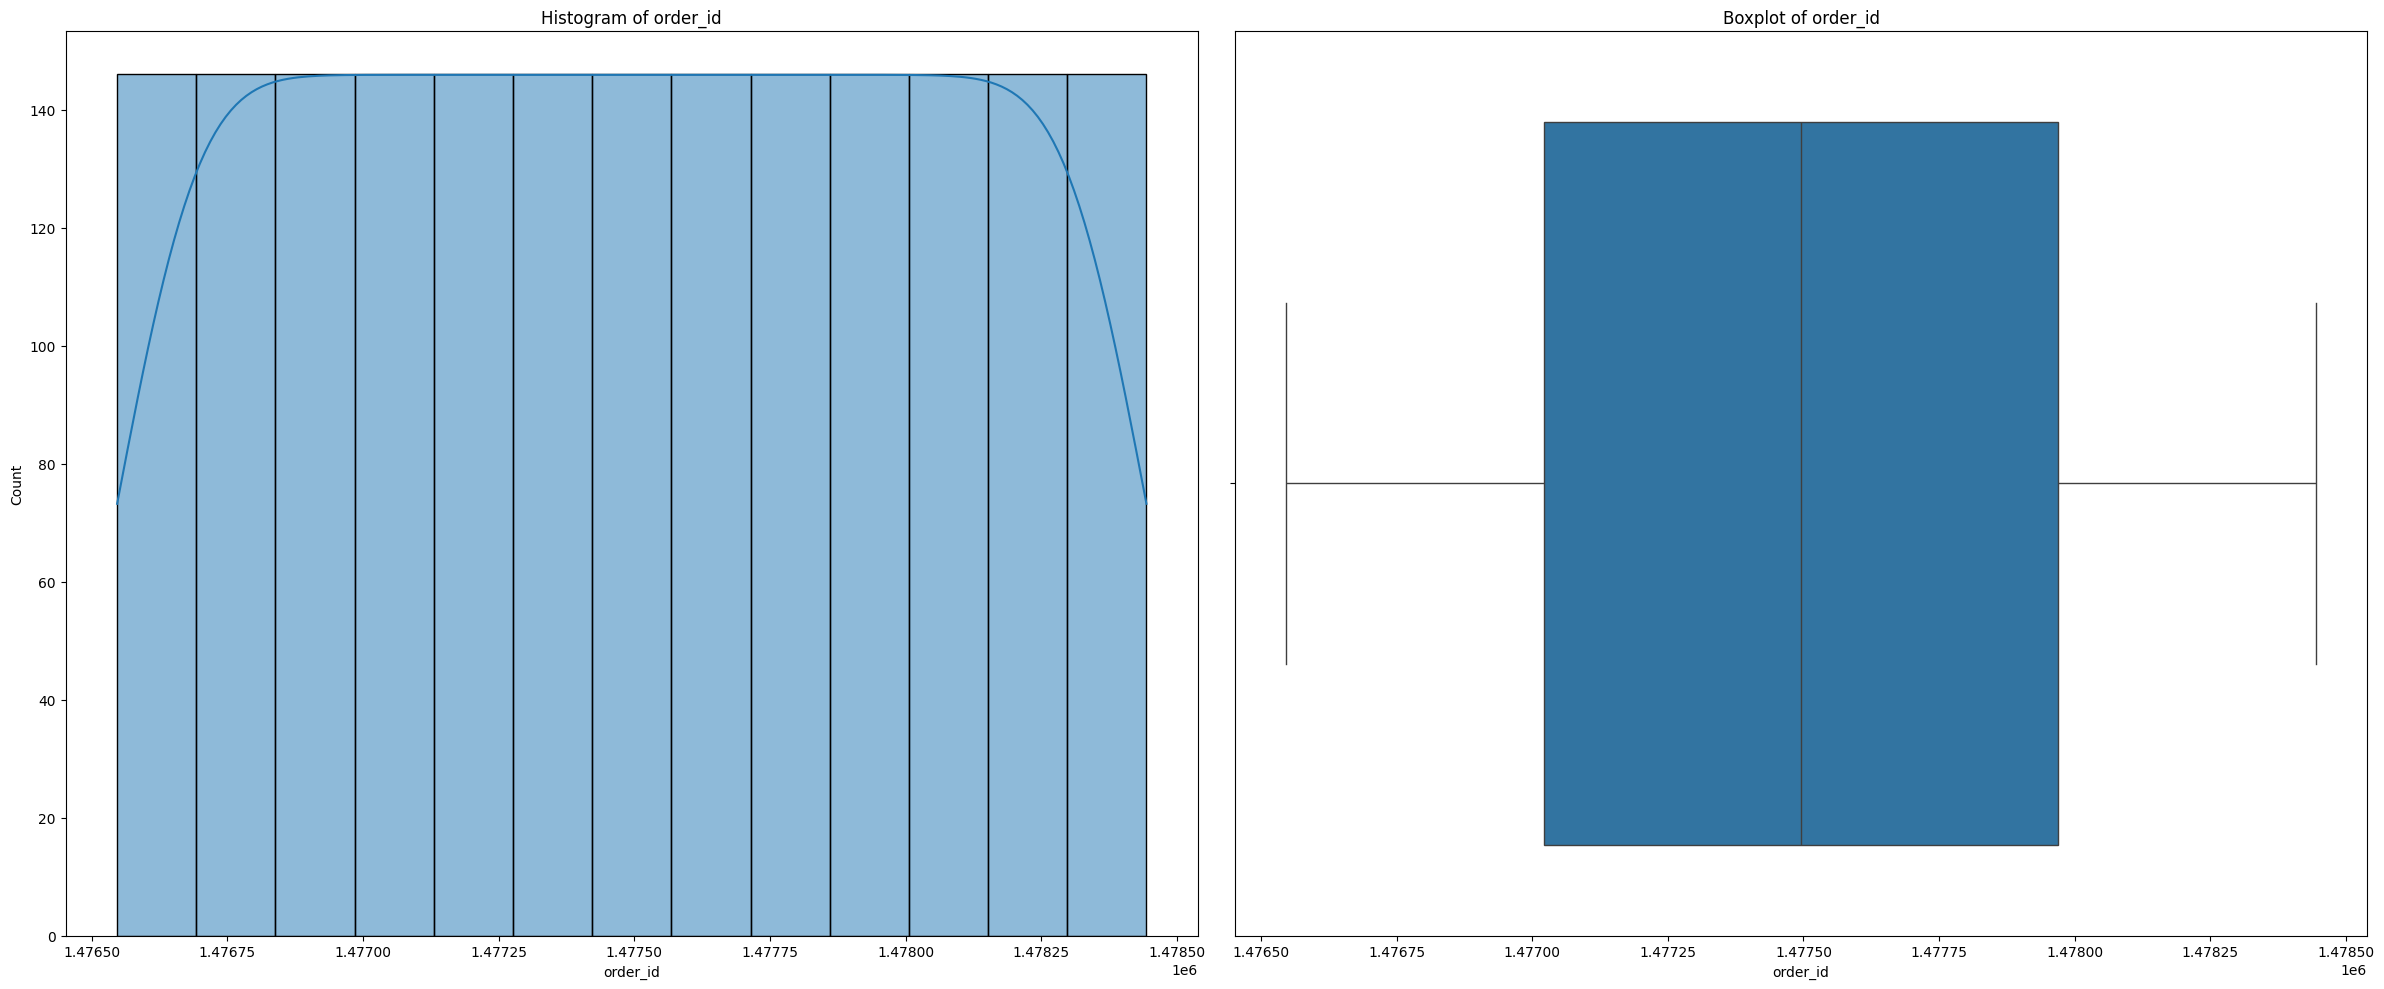

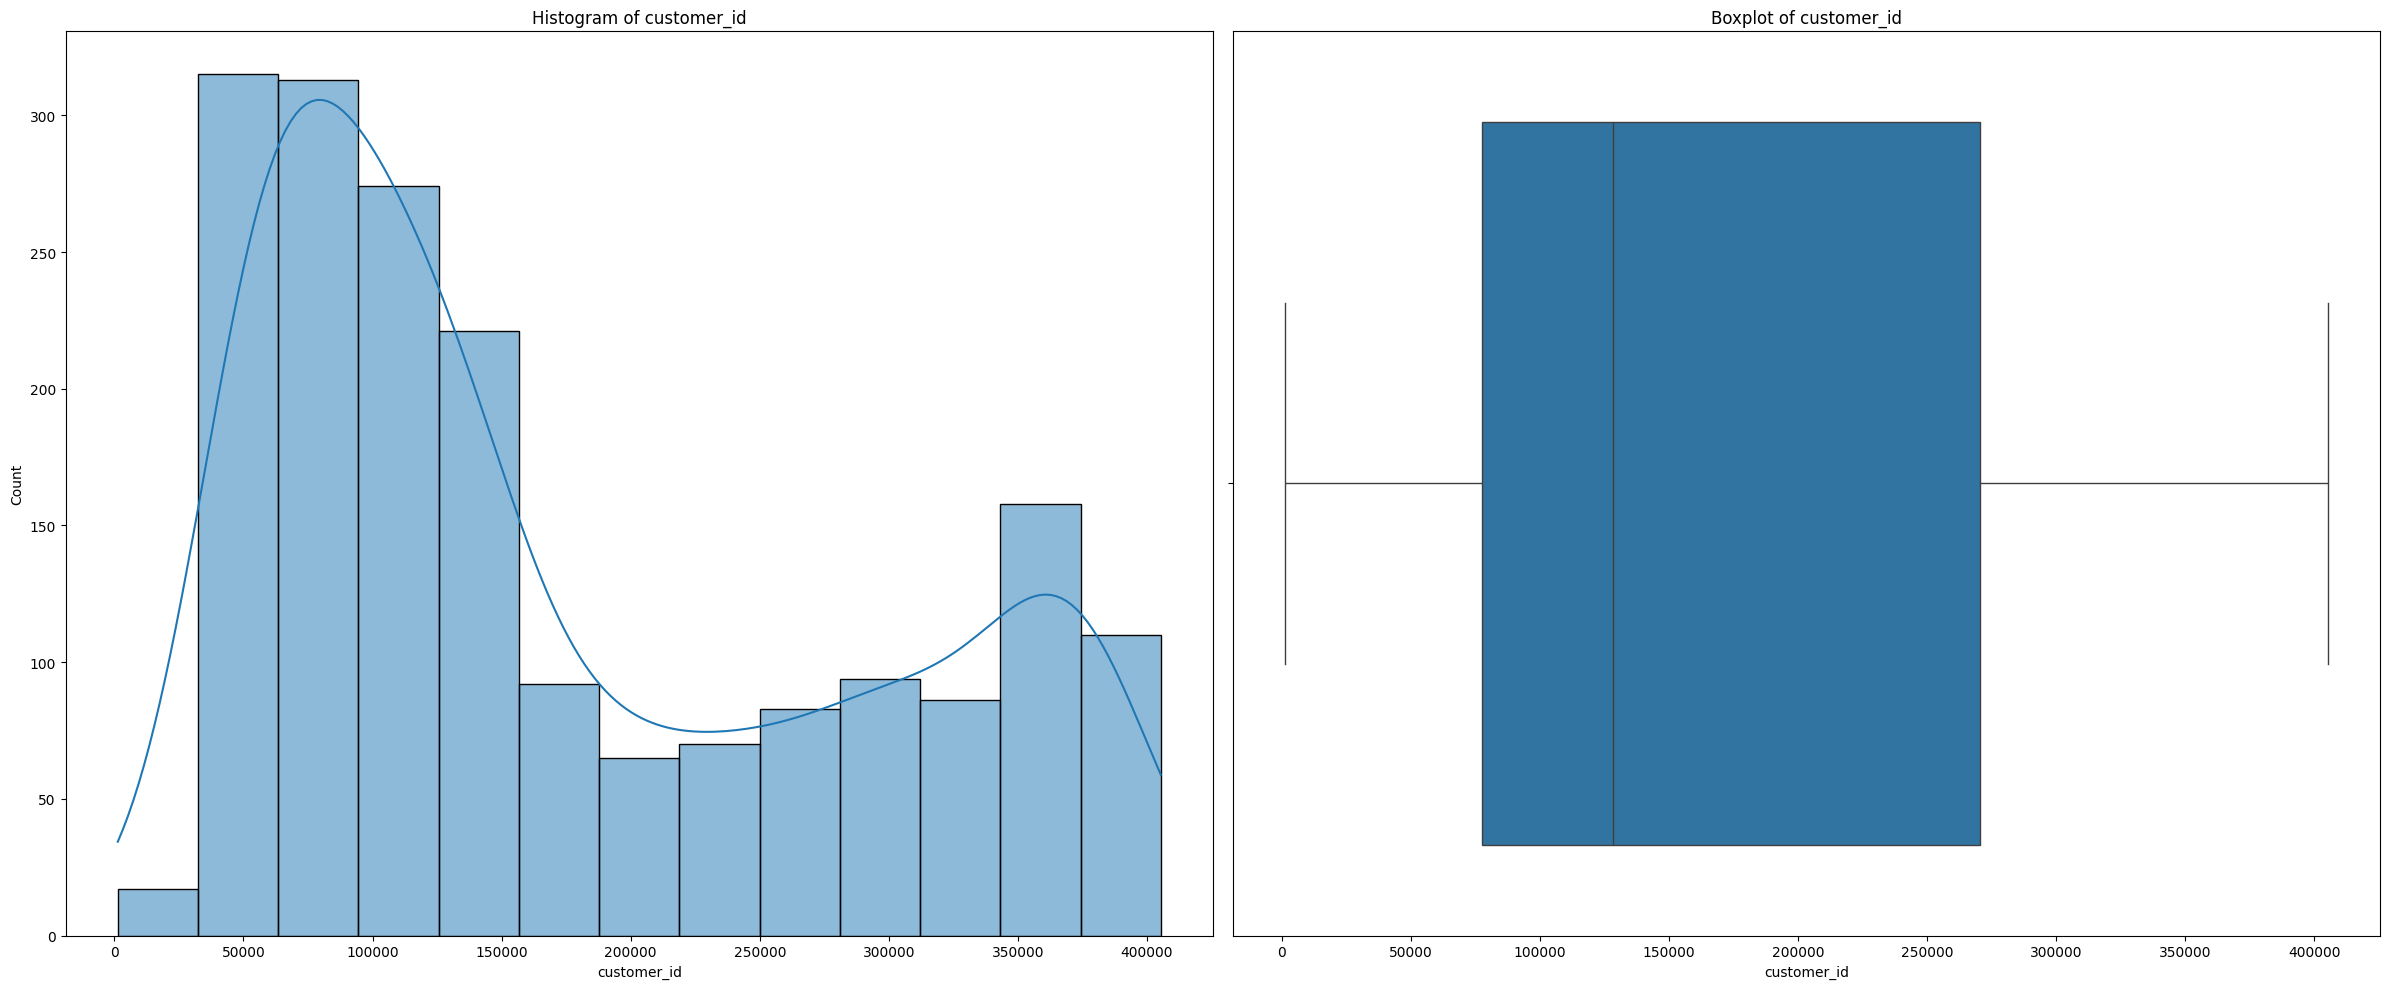

<ipython-input-19-4a4c6f304a78>:23: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-4a4c6f304a78>:23: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


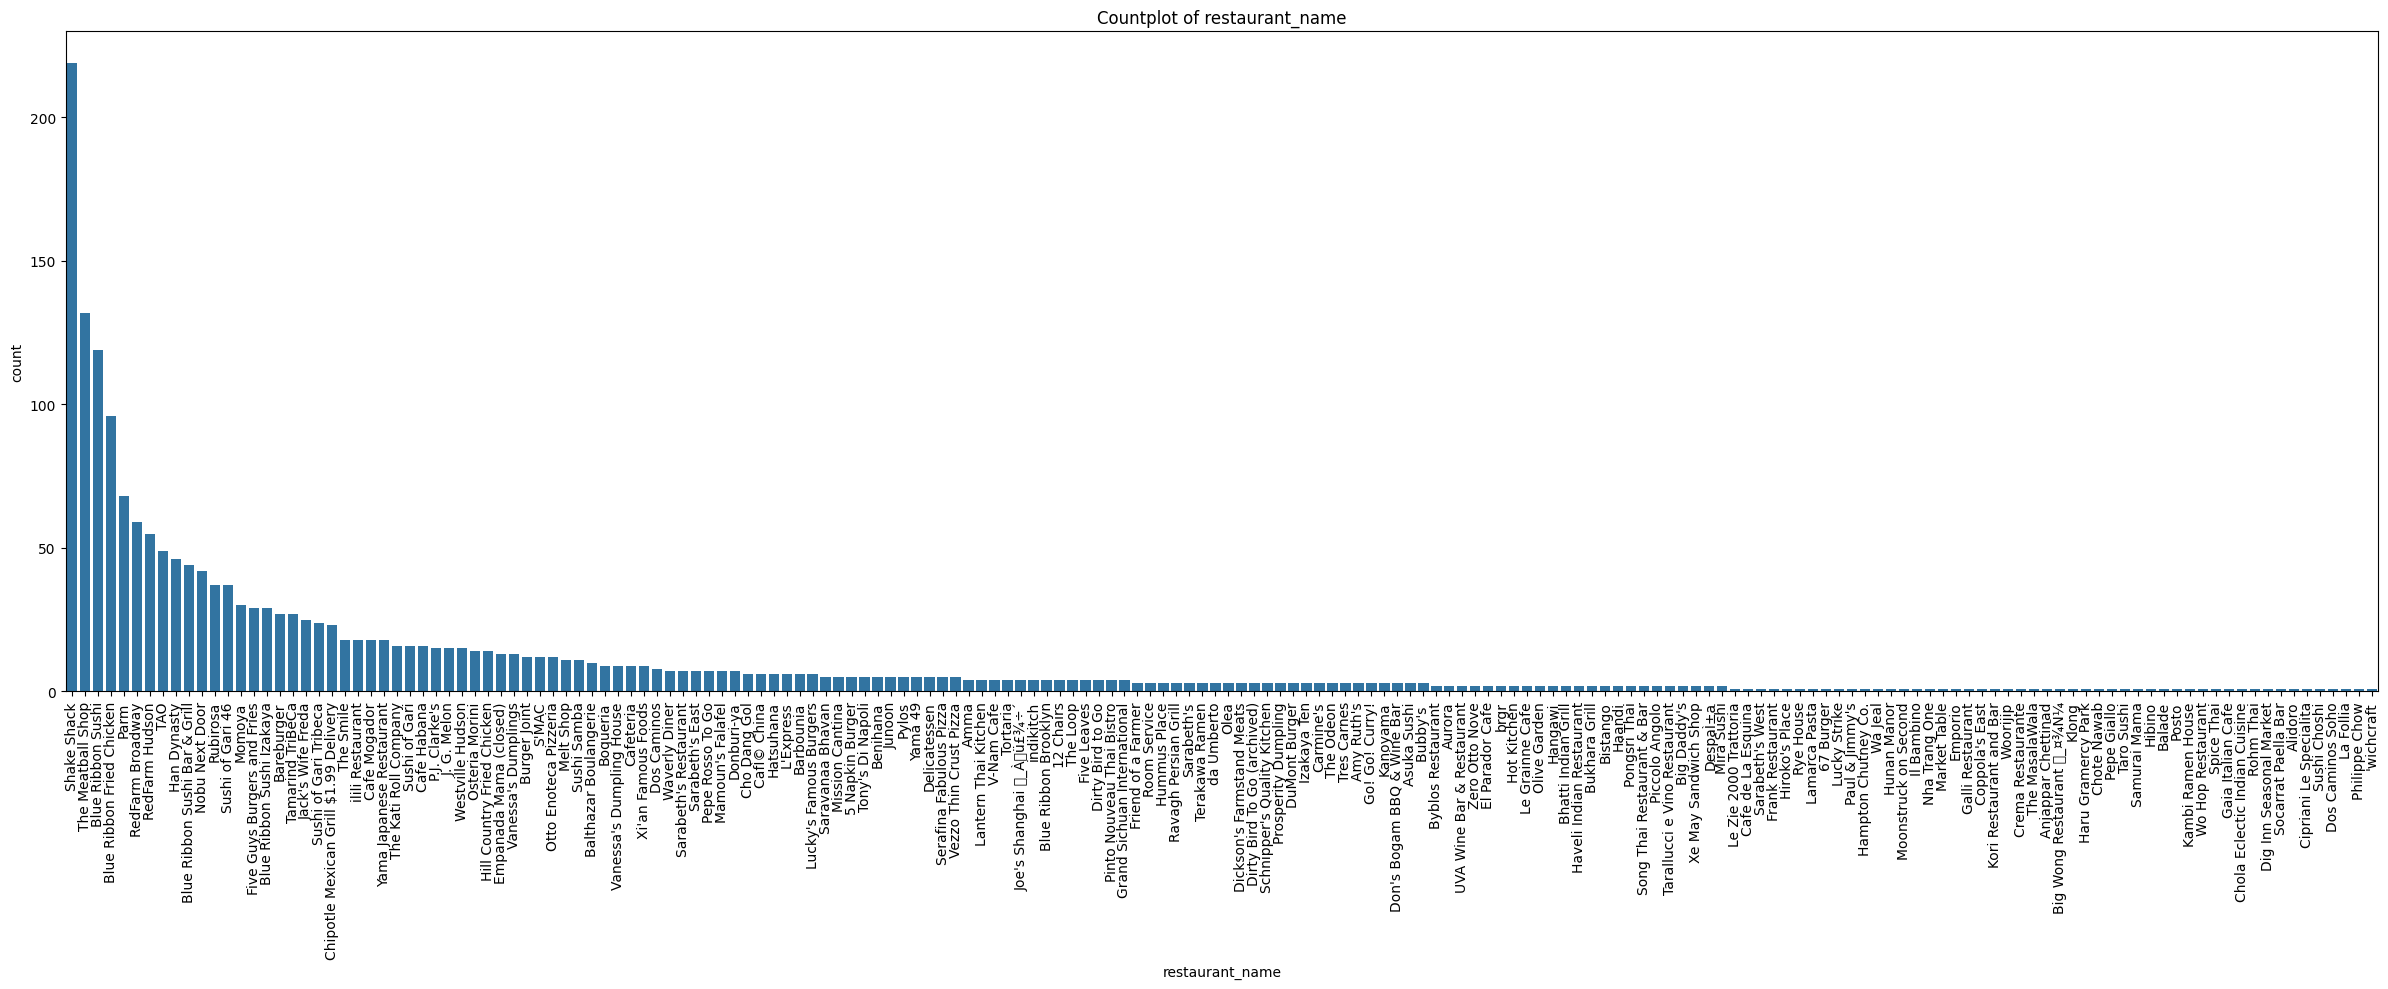

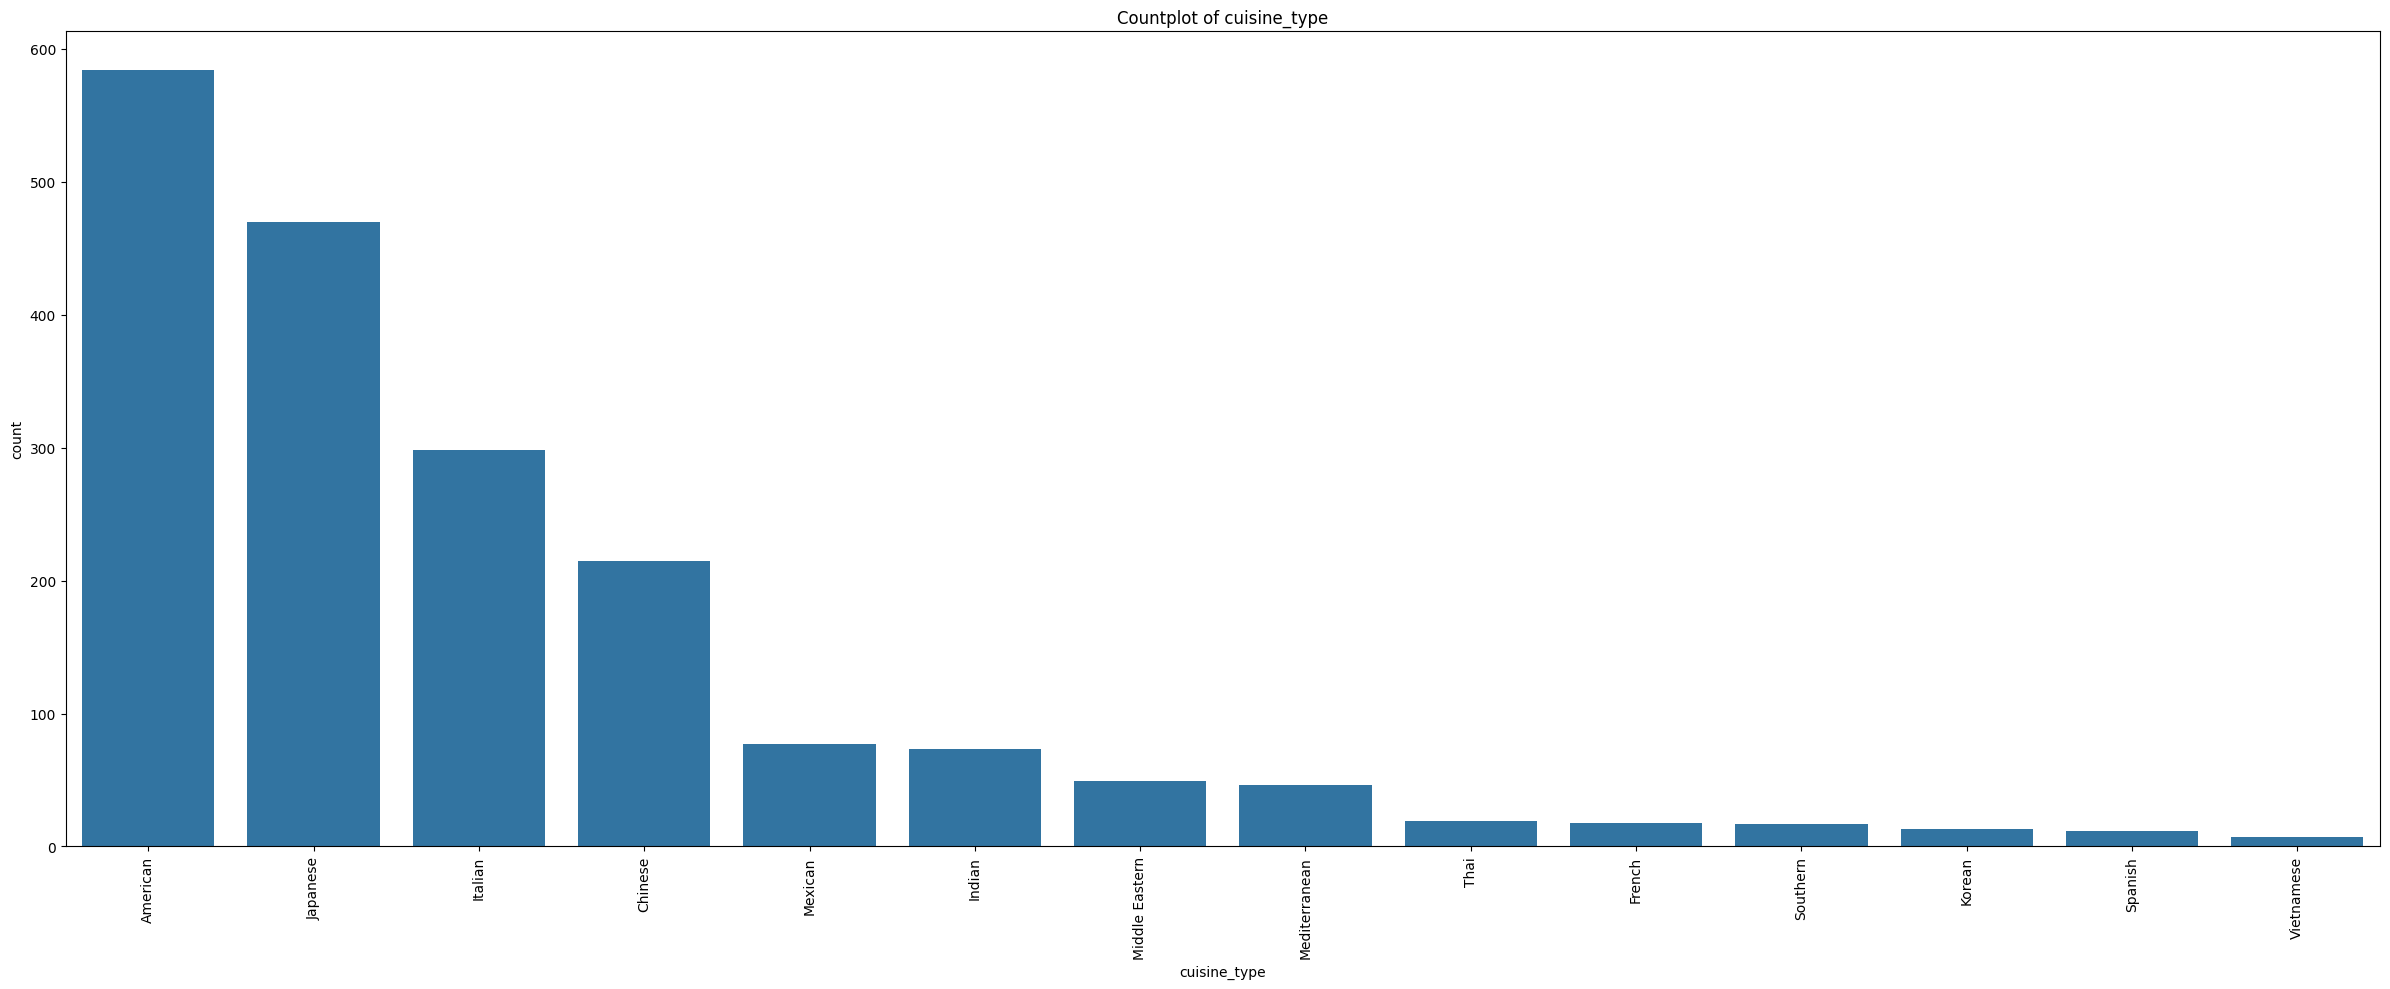

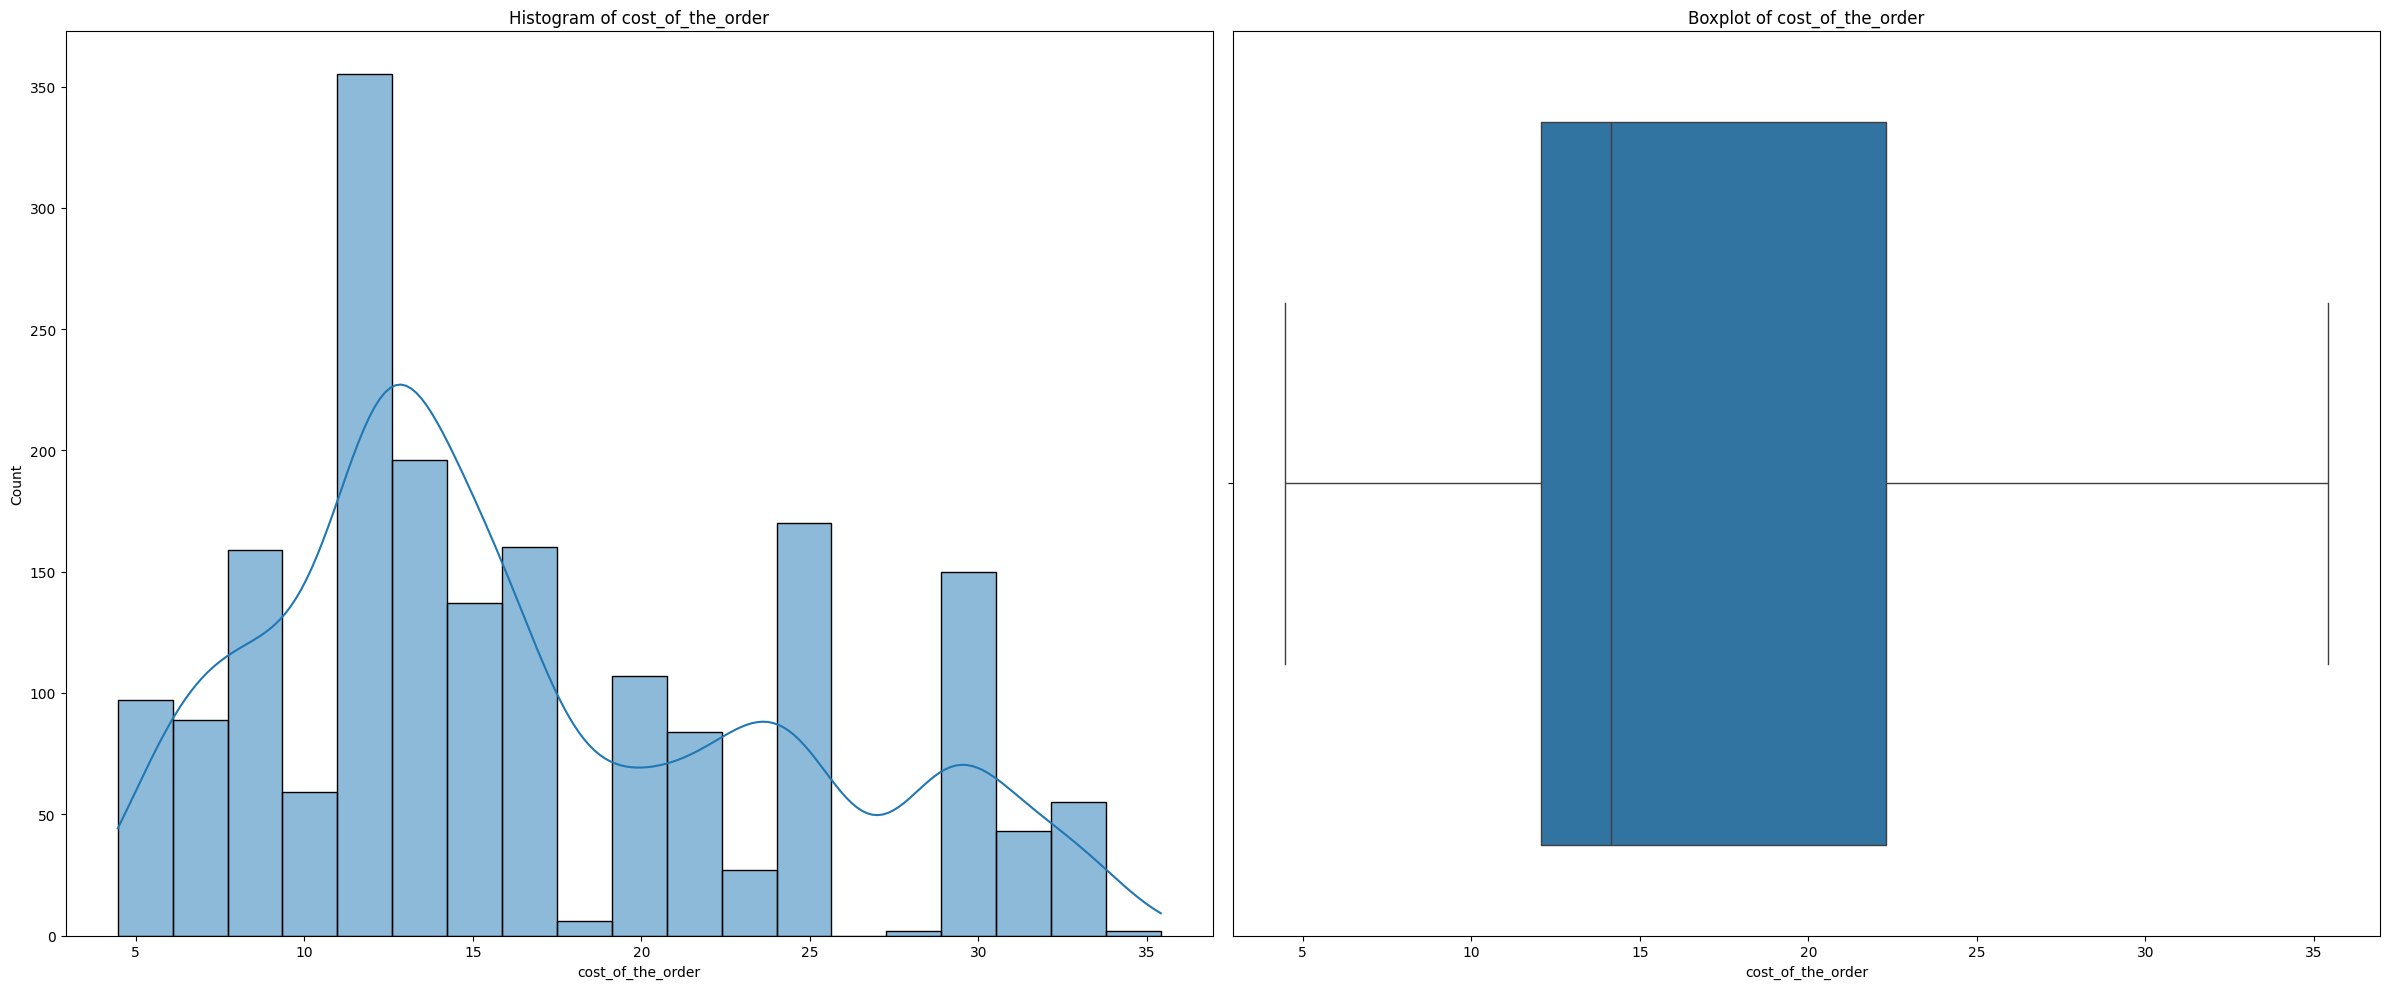

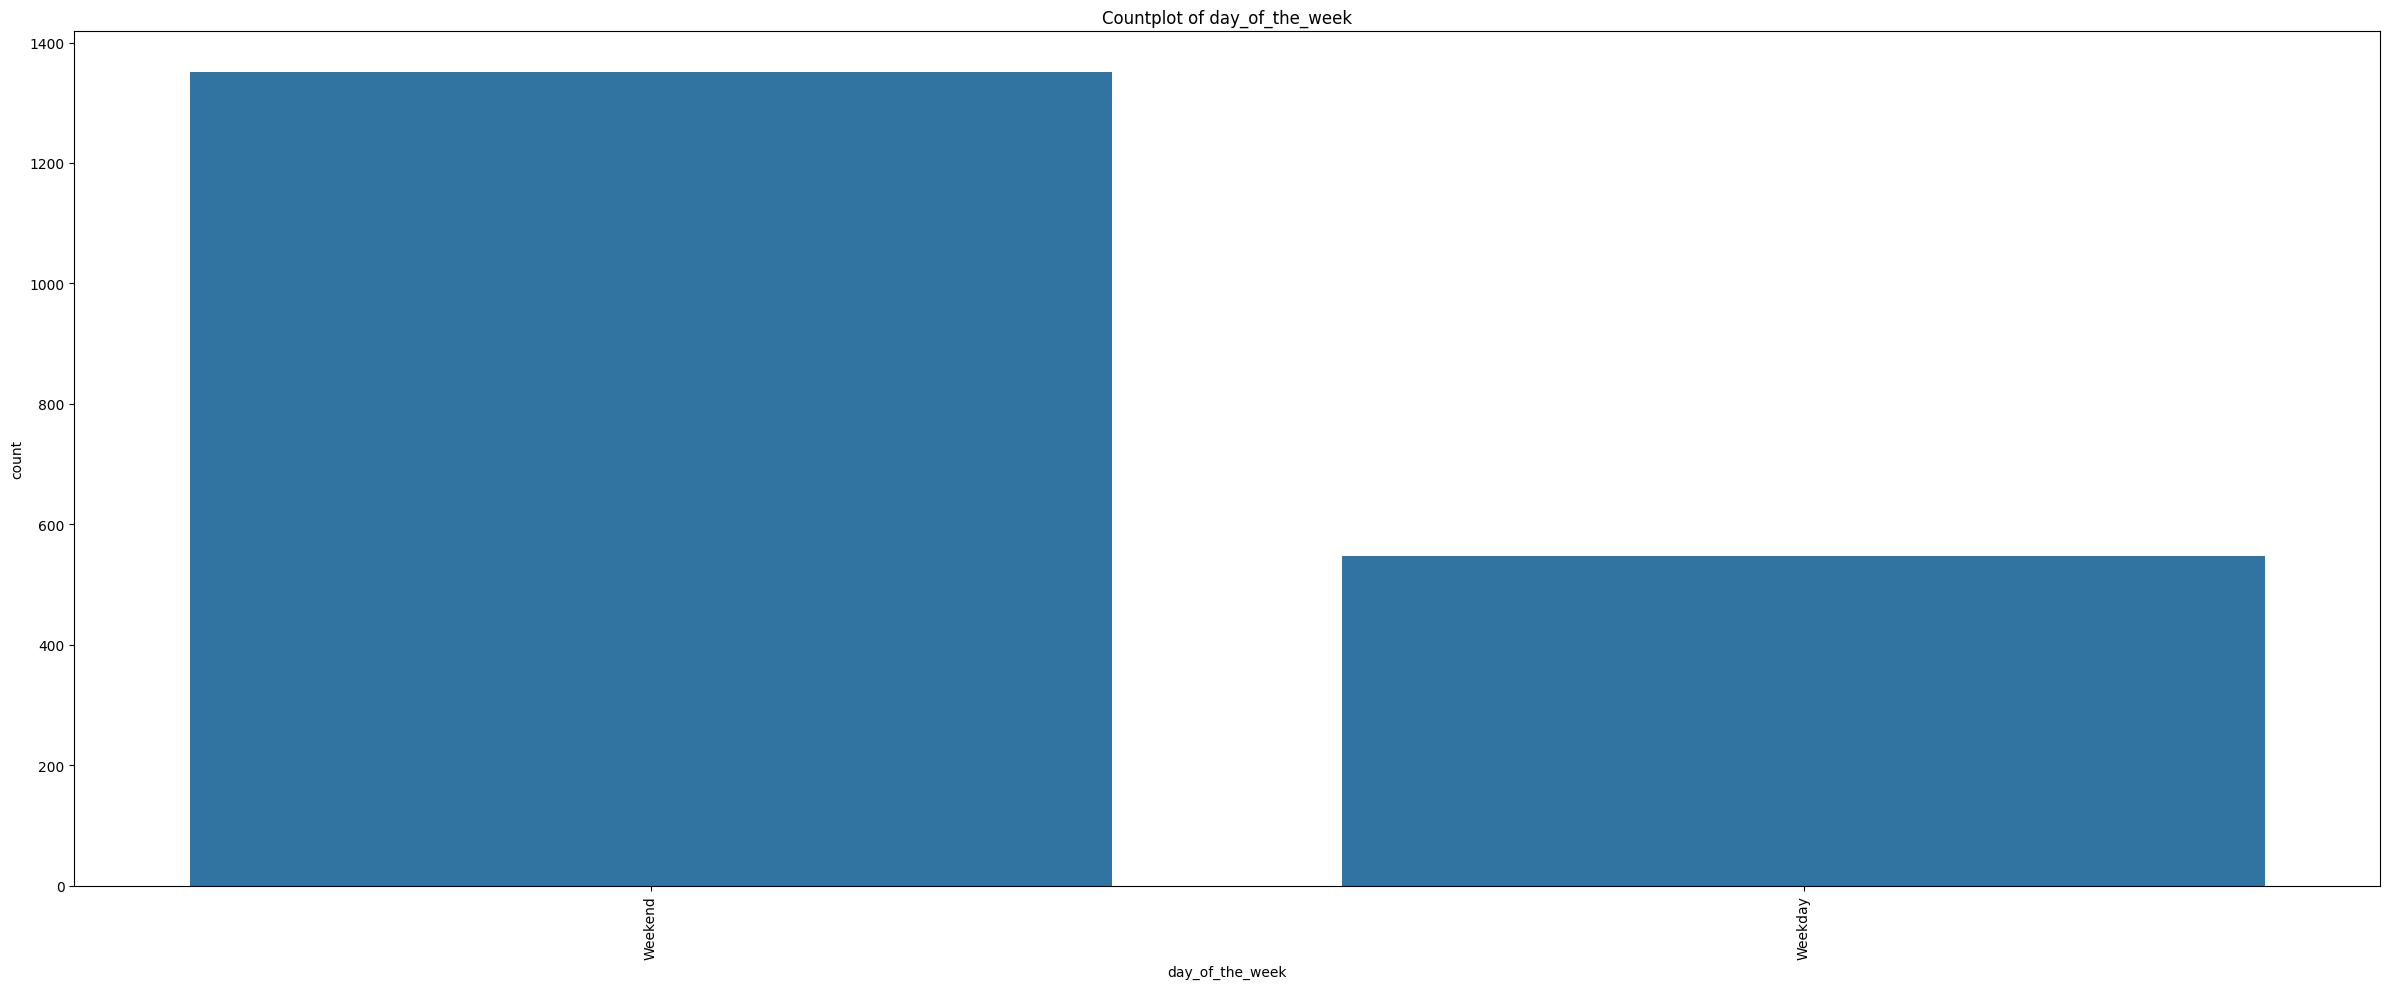

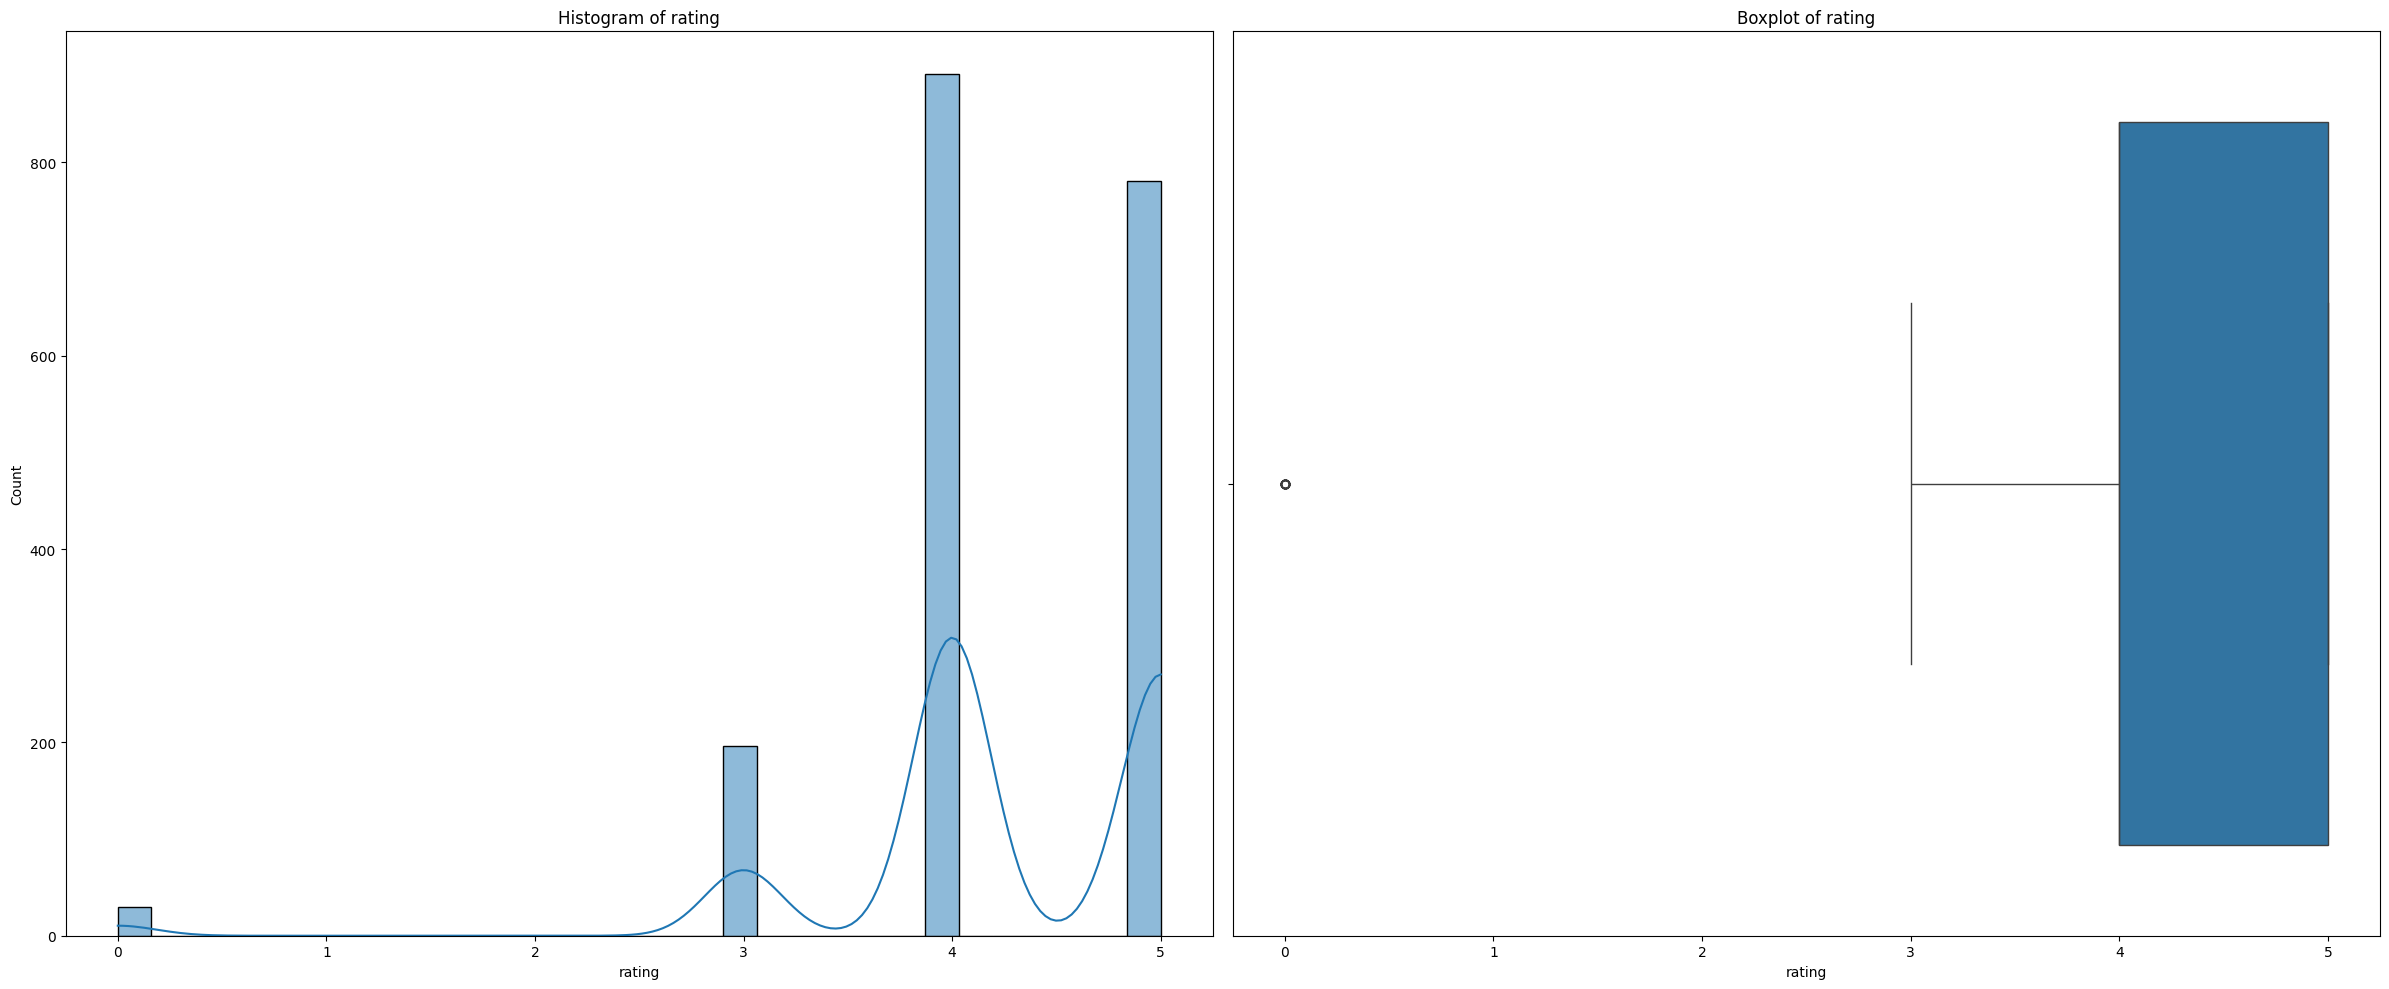

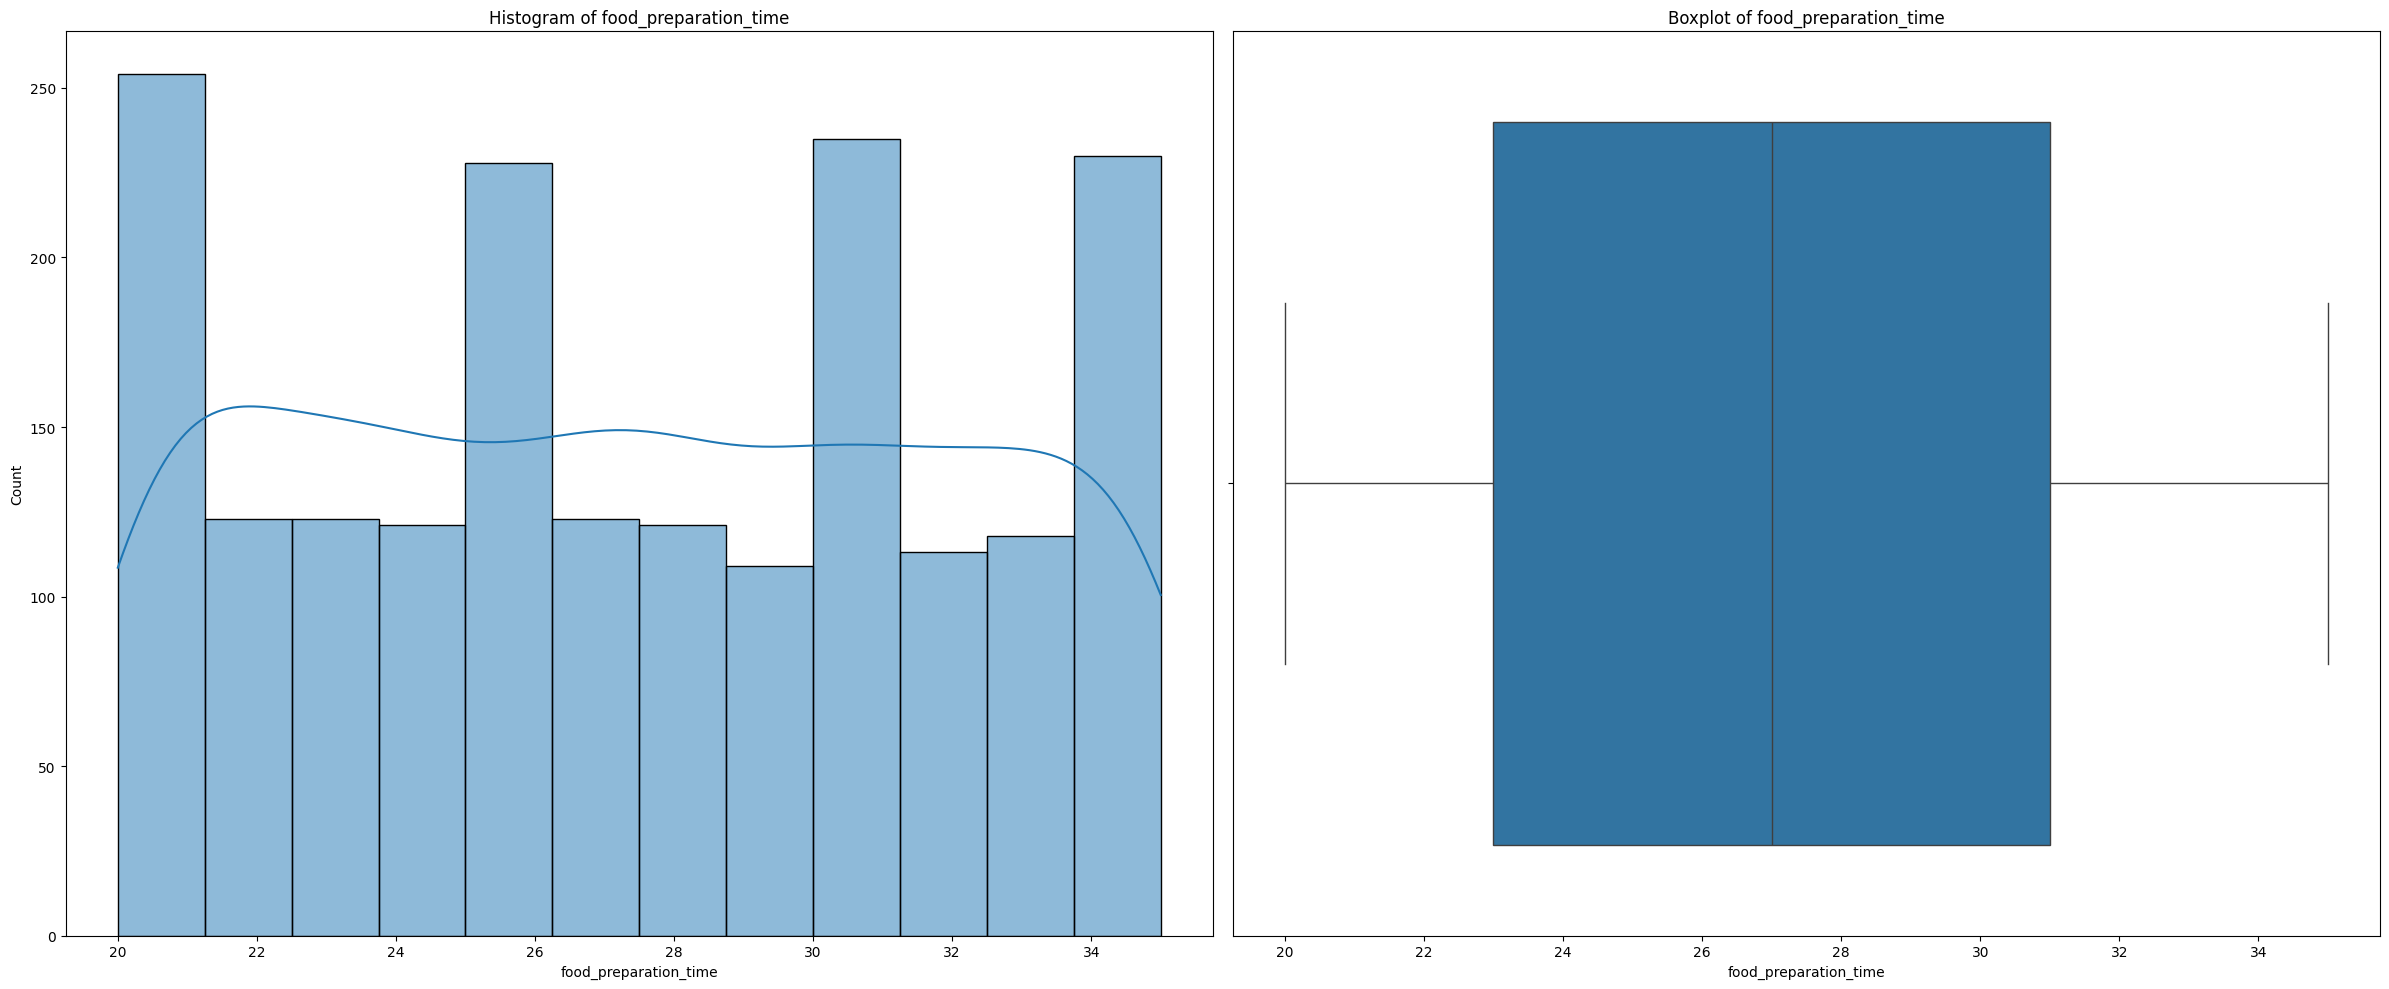

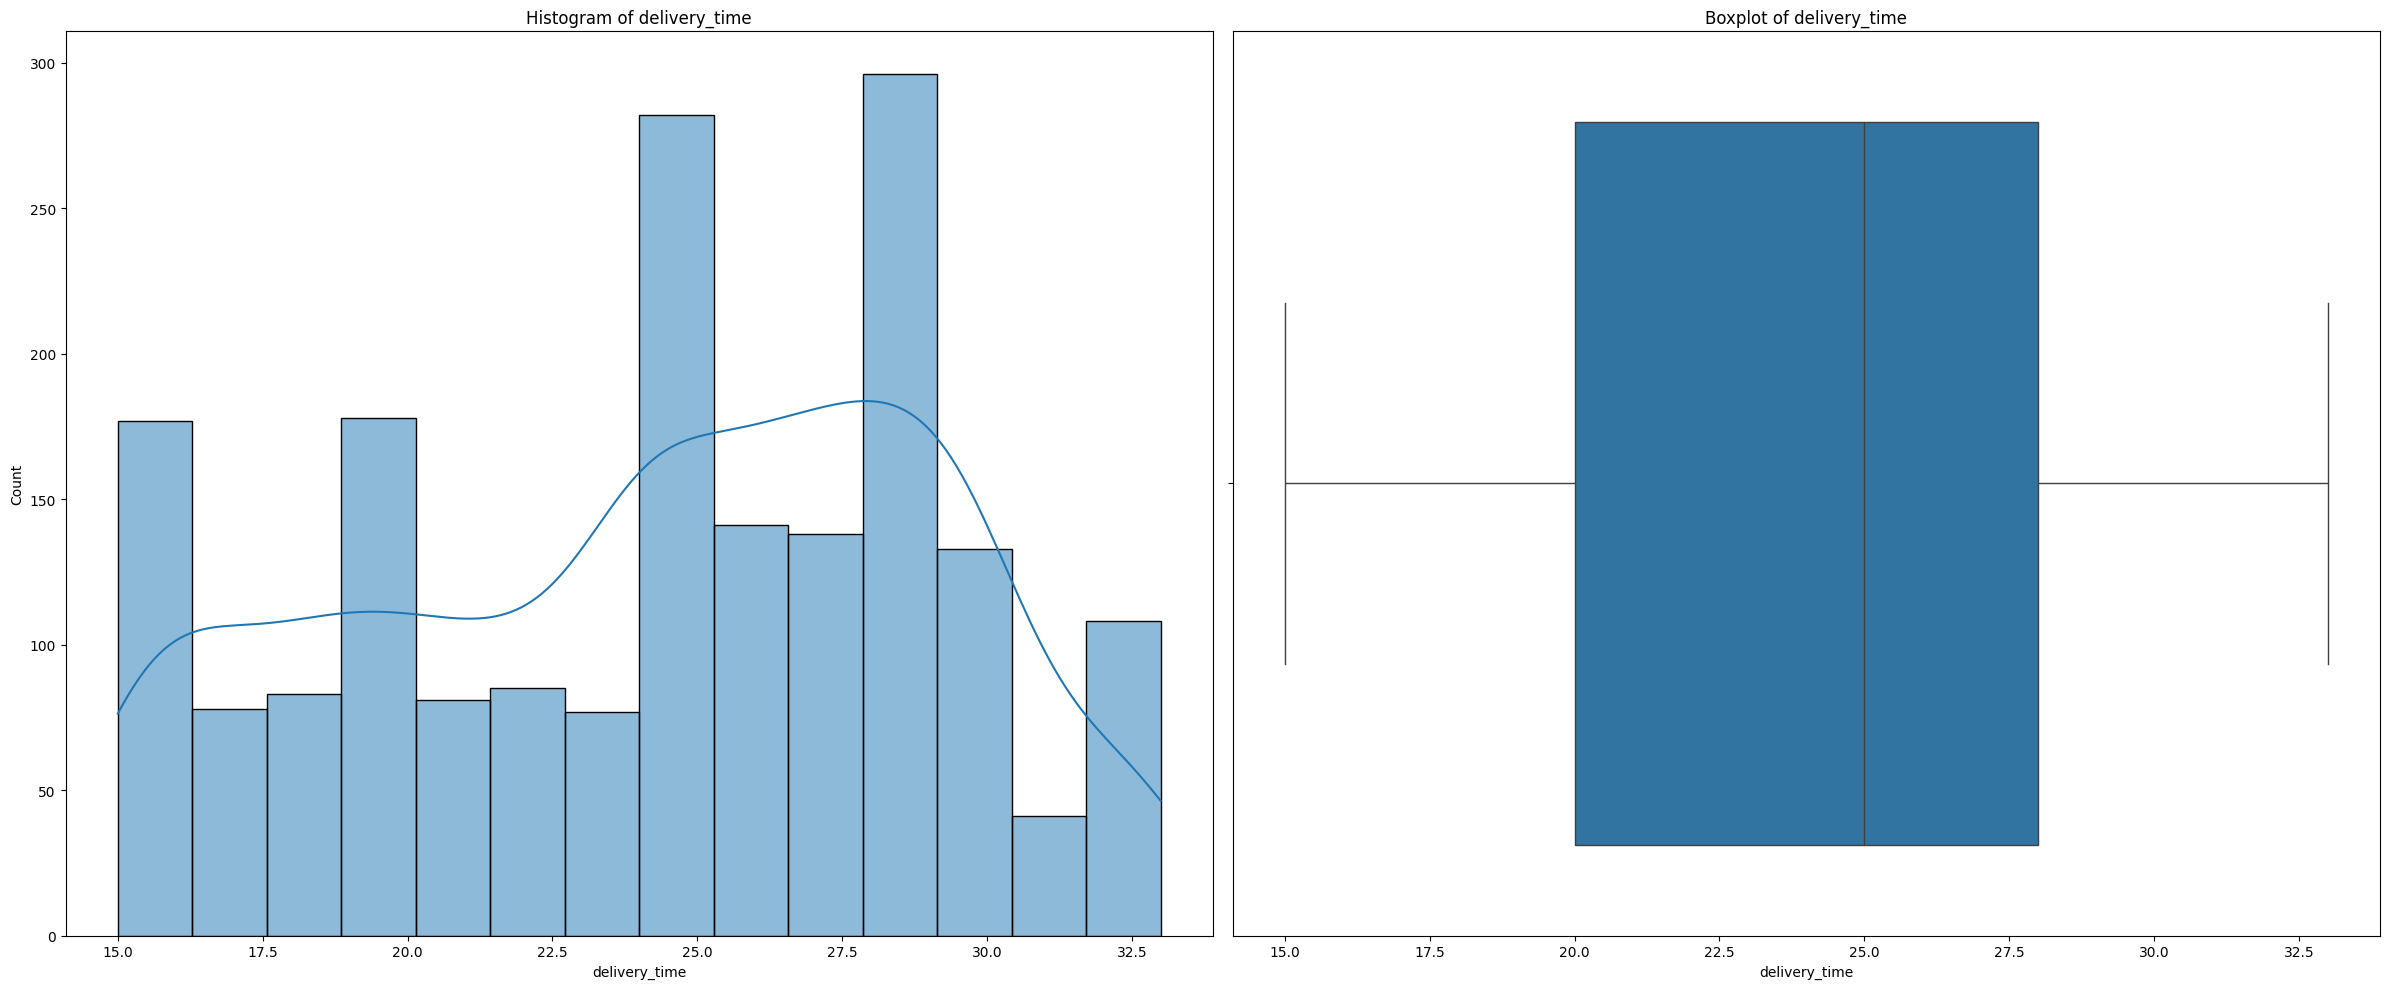

In [ ]:
# Loop over each column in the DataFrame
for col in df.columns:
    plt.figure(figsize=(24, 10))

    # Check if the column is numerical (int or float)
    if df[col].dtype in ['int64', 'float64']:
        # Create a subplot with a histogram and a boxplot
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot of {col}')

    # Otherwise, treat the column as categorical
    else:
        # Create a countplot for categorical variables
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


#### Observations:



*   order_id and customer_id seem to be irrelevant to our analysis since they are just identification numbers.
*   Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the top 3 restaurants based on the number of orders.
*   American, Japanese, and Italian are the top 3 cuisine types ordered.
*   The order cost graph is right-skewed, with a median around 14 and a mode around 12. Fifty percent of the order costs are between 12 and 23 USD.
*   Weekends are the most frequent days for orders.
*   The rating graph is left-skewed; it has a mode of 4, with more than 800 orders reviewed.
*   The food preparation time ranges between 20 and 35 minutes, has a mode of 21 minutes (with more than 250 orders), and a median of 27 minutes.
*   The delivery time has a median of 25 minutes, and fifty percent of its values are between 20 and 28 minutes.












### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Using the groupby function to group the rows by the unique values in the DataFrame, size() to count the number of rows in each group,
# and sort_values(ascending=False) to sort the counts in descending order.
top5_restaurants = df.groupby('restaurant_name').size().sort_values(ascending=False).head(5)
top5_restaurants

,0
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

As seen in the countplot, Shake Shack (219), The Meatball Shop (132), and Blue Ribbon Sushi (119) are the top 3 restaurants with the most orders.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#selects only the weekend rows and pick the cuisine_type column from those rows.
#Then, value_counts() counts the frequency of each cuisine, and idxmax() returns the cuisine with the highest count.

most_popular_cuisine = df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts().idxmax()
most_popular_cuisine

'American'

#### Observations:
We saw in the countplot that American cuisine was the most popular overall, and now we can see that the same tendency persists on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Using (df['cost_of_the_order'] > 20) returns 1 for True and 0 for False, so taking the mean gives the percentage of orders over 20.
percentage_orders_over20 = (df['cost_of_the_order'] > 20).mean() * 100
percentage_orders_over20


29.24130663856691

#### Observations:
The 29.24% of the orders cost more than 20 usd

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# mean()
df['delivery_time'].mean()

24.161749209694417

#### Observations:
In average the delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
top3_customer = df.groupby('customer_id').size().sort_values(ascending=False).head(3)
top3_customer

,0
customer_id,
52832,13
47440,10
83287,9


In [ ]:
# Use groupby to get the order count per customer and selects the top 3, with ,index get the ID and df[df['customer_id'].isin gets the orders
top3_customers_orders = df[df['customer_id'].isin(df.groupby('customer_id').size().nlargest(3).index)]
top3_customers_orders

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
103,1476564,83287,Five Guys Burgers and Fries,American,24.30,Weekend,5.0,30,20
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3.0,33,27
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,4.0,31,23
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4.0,25,25
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,4.0,33,22
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4.0,23,28
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5.0,28,28
579,1477178,47440,Bareburger,American,24.20,Weekend,4.0,23,23
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,5.0,35,19
663,1476673,83287,Blue Ribbon Sushi Izakaya,Japanese,9.51,Weekend,4.0,35,21


#### Observations:
The top 3 customers are 52832(13),47440(10) and 83287(9).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


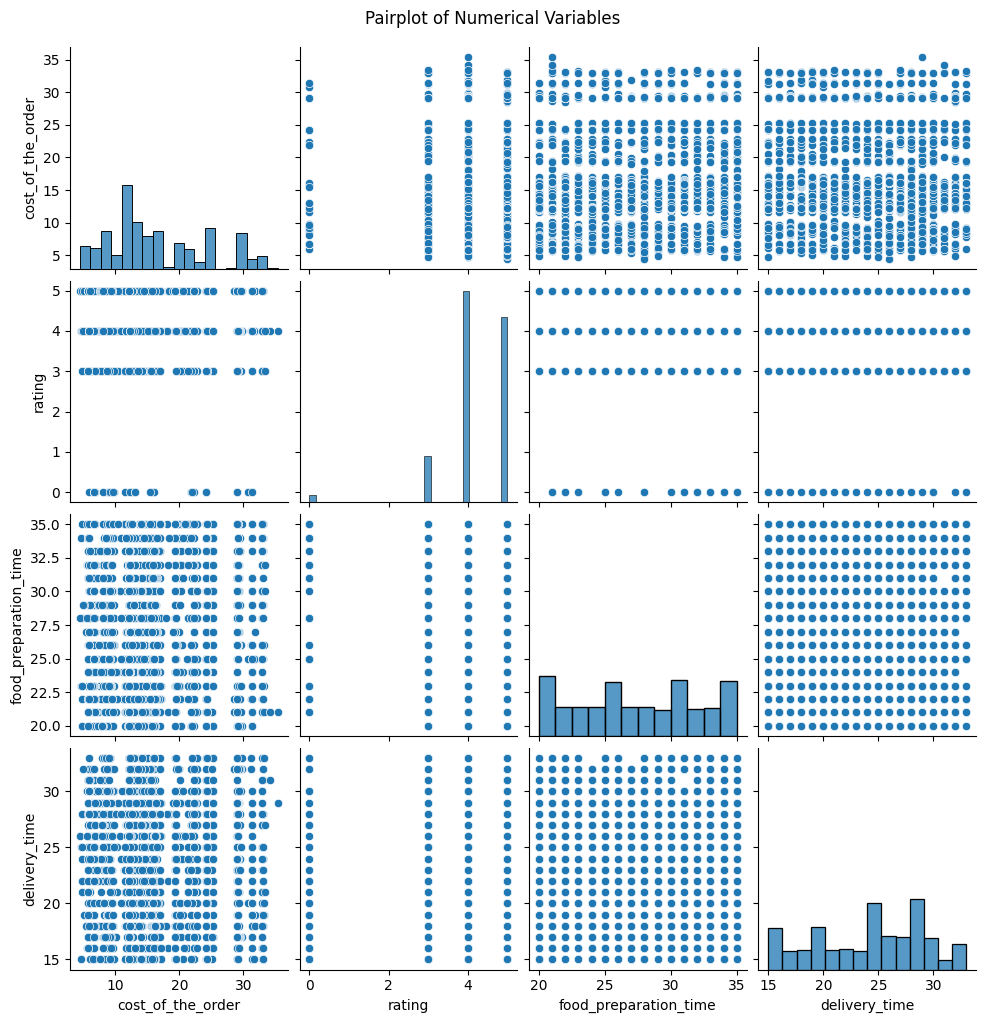

In [ ]:
# Select only numerical columns and drop 'customer_id' and 'order_id'
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['customer_id', 'order_id'], axis=1)

# Create the pairplot for the remaining numerical variables
sns.pairplot(numerical_df)
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

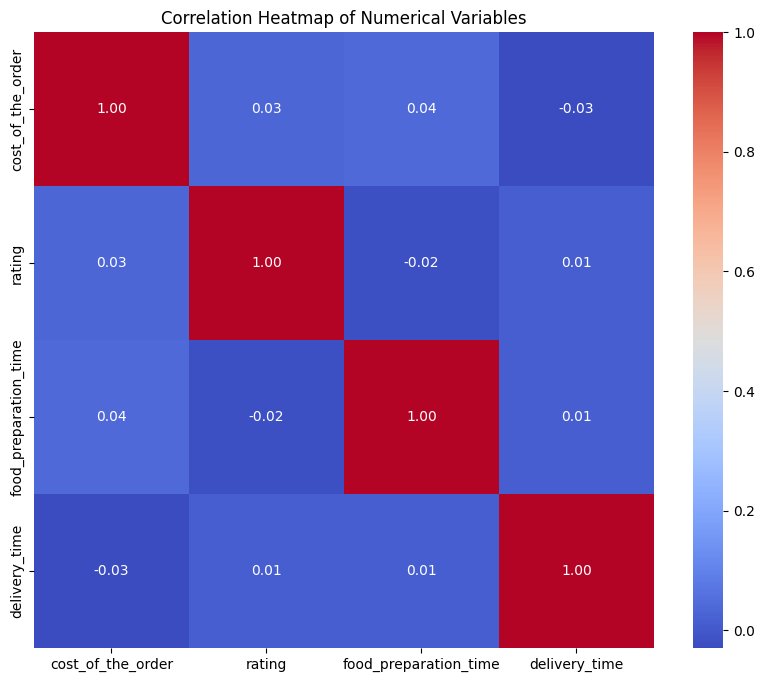

In [ ]:
# Correlation heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

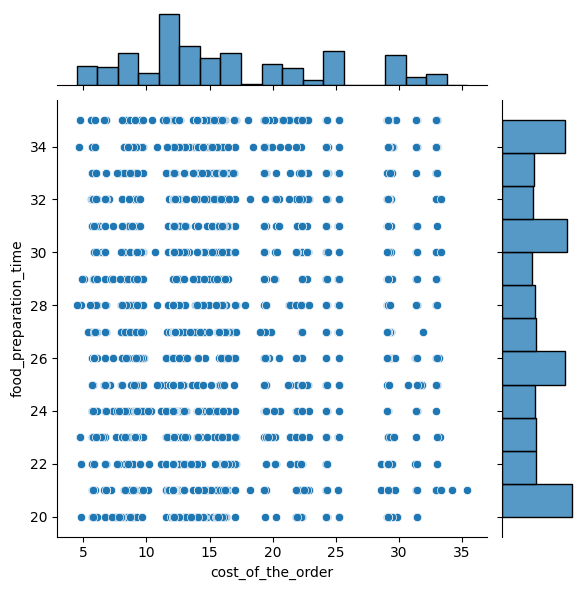

In [ ]:
sns.jointplot(data=df, x='cost_of_the_order', y='food_preparation_time')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


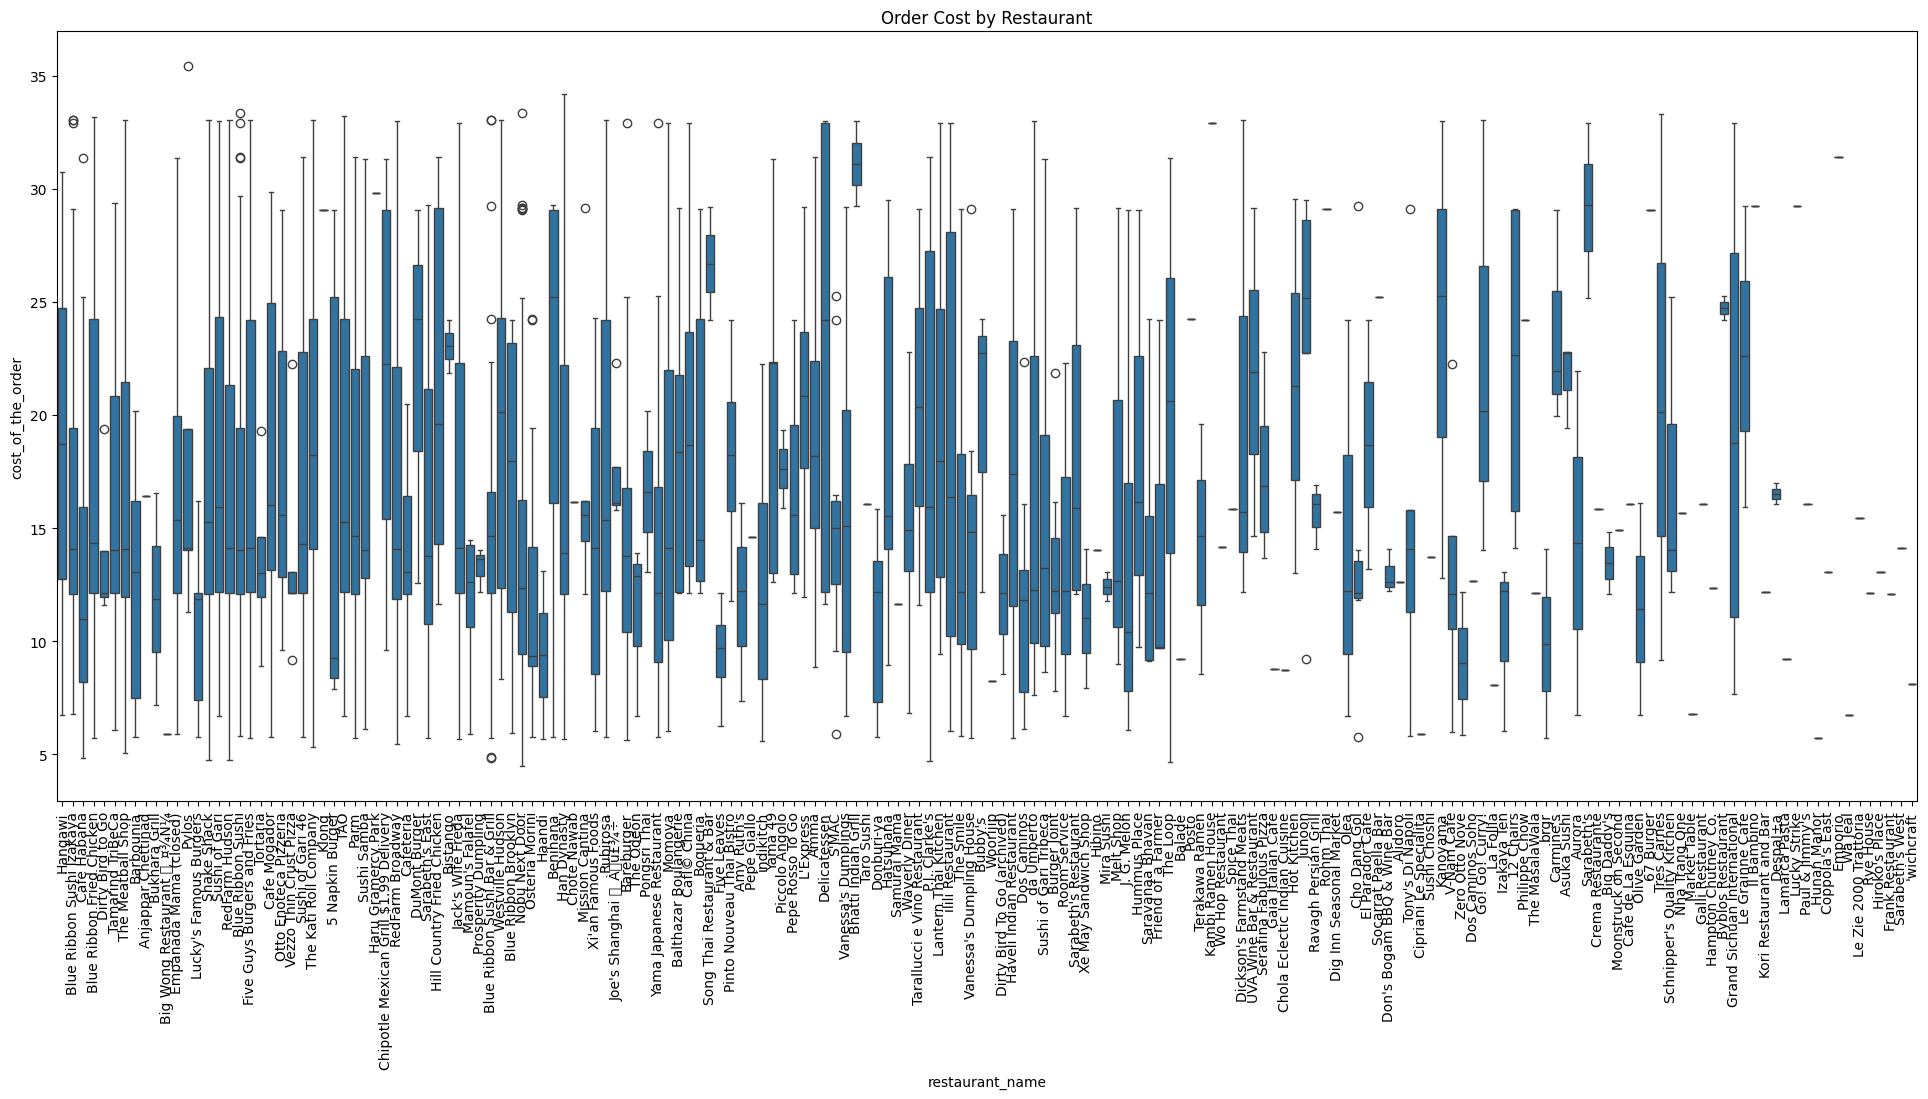

In [ ]:
plt.figure(figsize=(24,10))
sns.boxplot(data=df, x='restaurant_name', y='cost_of_the_order')
plt.title("Order Cost by Restaurant")
plt.xticks(rotation=90)
plt.show()

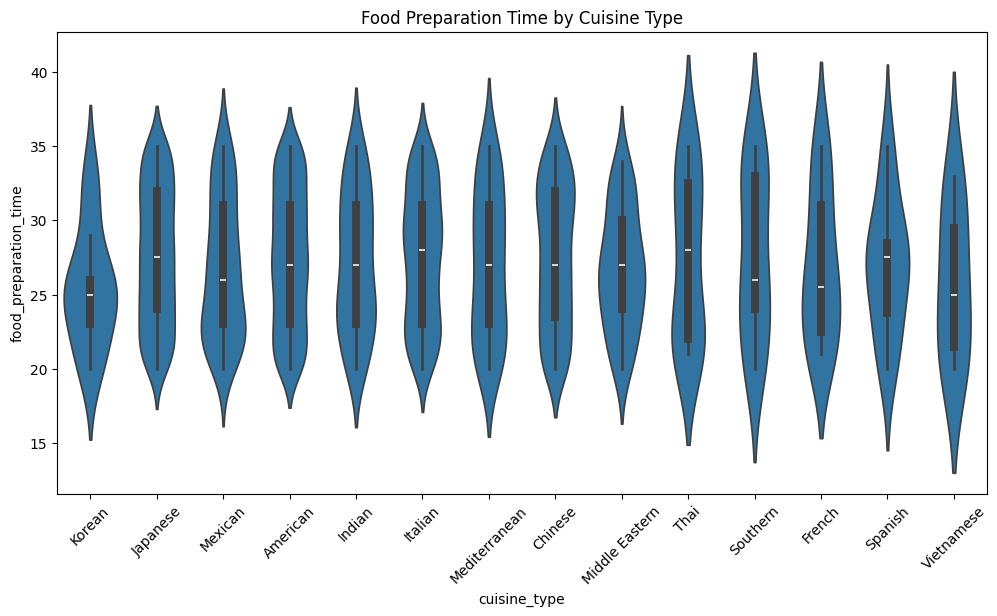

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title("Food Preparation Time by Cuisine Type")
plt.xticks(rotation=45)
plt.show()

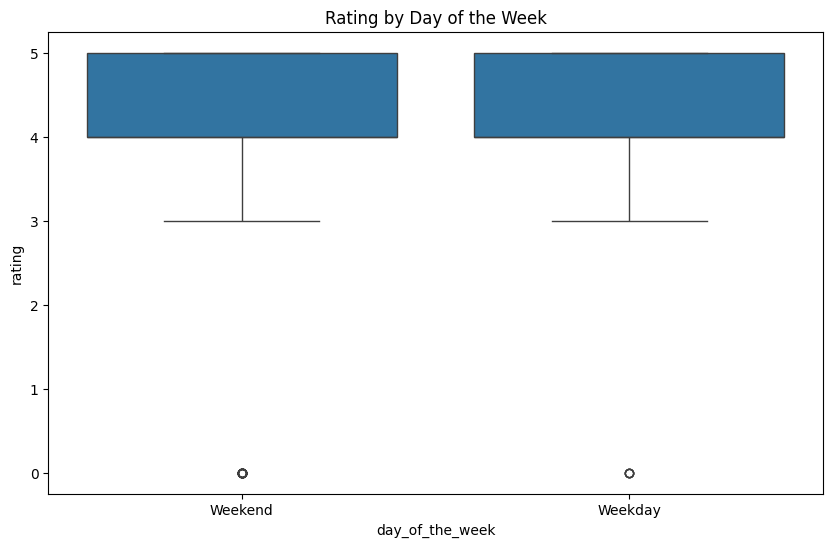

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_of_the_week', y='rating')
plt.title("Rating by Day of the Week")
plt.show()

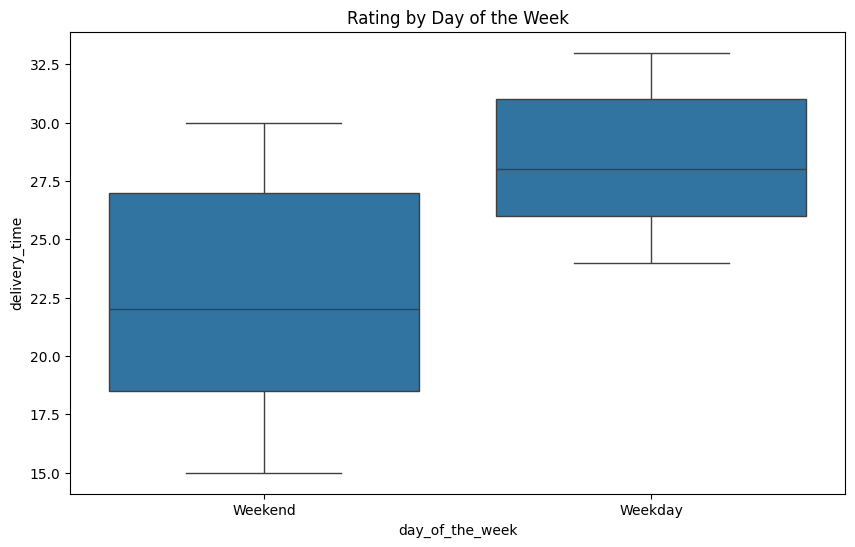

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Rating by Day of the Week")
plt.show()

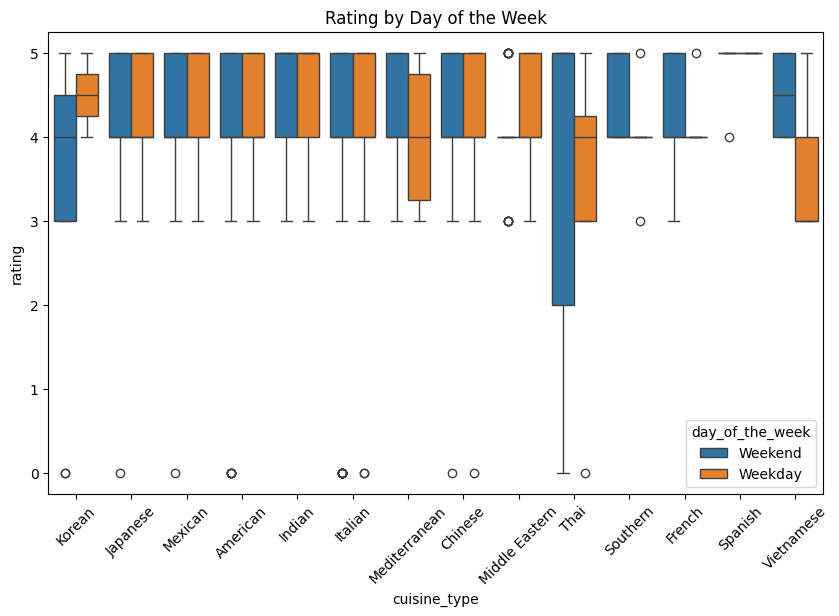

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cuisine_type', y='rating', hue='day_of_the_week')
plt.title("Rating by Day of the Week")
plt.xticks(rotation=45)
plt.show()

#### Observations:
There does not appear to be a strong relationship between the numerical variables. I expected to see a strong correlation between rating and cost_of_the_order or between rating and delivery_time, but the strongest relationship observed is between cost_of_the_order and food_preparation_time—barely 0.04%, which is very weak.

Most orders are around 10–20 USD with a food preparation time between 20 and 30 minutes.

Examining the relationship between restaurant_name and cost_of_the_order, we see that Delicatessen has 50% of its orders ranging between 13 and 33 USD (the largest range), Taro Sushi has all its orders above 27 USD, and Zero Otto Nove has 75% of its orders below 11 USD (the lowest).

When looking at the relationship between food_preparation_time and cuisine_type, Korean cuisine has the shortest preparation time, while Southern cuisine has the longest.

The day_of_the_week does not appear to affect the ratings of the restaurants.

Delivery_time is higher on weekdays than on weekends.

Finally, most cuisine types have ratings ranging between 3 and 5, except for  Thai that has a larger range 0-5, and also must of the cuisine has better rating in weekend except Korean and Middle Eastern.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant_name and calculate both the count of ratings and the average rating
rating_stats = df.groupby('restaurant_name')['rating_numeric'].agg(
    rating_count='size',  # number of ratings
    avg_rating='mean'     # average rating
)

# Filter for restaurants with more than 50 ratings and an average rating > 4
eligible_restaurants = rating_stats[
    (rating_stats['rating_count'] > 50) &
    (rating_stats['avg_rating'] > 4)
]

print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           rating_count  avg_rating
restaurant_name                                    
Blue Ribbon Fried Chicken            64    4.328125
Blue Ribbon Sushi                    73    4.219178
Shake Shack                         133    4.278195
The Meatball Shop                    84    4.511905


#### Observations:
For this analysis, I used a column that I created before imputing the mean values into the missing/"Not given" entries in the rating column, so it wouldn't affect the original information. This column contains only the original ratings, and rows with "Not given" values have been deleted. Based on this information, there are only 4 restaurants with more than 50 reviews and an average rating above 4: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a function with if statements for the conditions asked
def compute_fee(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate the fee for each order
df['company_fee'] = df['cost_of_the_order'].apply(compute_fee)

# Sum up the fees to get the total net revenue
net_revenue = df['company_fee'].sum()

print("Net revenue generated by the company:", net_revenue)

Net revenue generated by the company: 6166.303


#### Observations:
The total net revenue genereted by the company is $6,166.30 USD

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Compute the percentage of orders taking more than 60 minutes
percentage_over_60 = (df['total_time'] > 60).mean() * 100

print("Percentage of orders taking more than 60 minutes:", percentage_over_60)

Percentage of orders taking more than 60 minutes: 10.537407797681771


#### Observations:
To get the percentage of orders that take more than 60 minutes, we simply need to create a new column that sums the food_preparation_time and delivery_time, and then calculate the mean of the orders exceeding 60 minutes, which in this case is 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for each day type
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Calculate the difference between weekdays and weekends
difference = mean_delivery_time['Weekday'] - mean_delivery_time['Weekend']

print("Mean Delivery Time on Weekdays:", mean_delivery_time['Weekday'])
print("Mean Delivery Time on Weekends:", mean_delivery_time['Weekend'])
print("Difference (Weekday - Weekend):", difference)

Mean Delivery Time on Weekdays: 28.305882352941175
Mean Delivery Time on Weekends: 22.436739659367397
Difference (Weekday - Weekend): 5.869142693573778


#### Observations:
The mean delivery time is 28.34 minutes on weekdays and 22.47 minutes on weekends, so deliveries on weekends are 5.86 minutes faster.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Despite not finding any strong correlations between variables, we can draw several conclusions:


*   The top 3 restaurants are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi, in that order.
*   The top 3 cuisines are American, Japanese, and Italian, which makes sense given the top 3 restaurants.
*   Most orders are made on weekends—more than double the number on weekdays.
*   Only Blue Ribbon Fried Chicken among the top restaurants has more than 50 reviews and an average rating above 4.
*   Delivery time is higher on weekdays than on weekends, with an average difference of more than 5.86 minutes.
*   Ratings are generally high, between 3 and 5, with 75% falling between 4 and 5, although around 38.77% are marked as "Not given" or are missing.
*   Order costs are mainly between 12 and 22 USD (50%) .
*   Food preparation time is primarily between 23 and 31 minutes (50%).
*   Delivery time is mostly between 20 and 28 minutes(50%).
*   10% of orders take more than 60 minutes to be prepared and delivered.
*   The company generated a net revenue of 6,166.30 USD.



### Recommendations:

*   Implement strategies to encourage customers to rate their orders—for example, by offering incentives or promotions. Gathering more detailed information about order ratings could help develop better strategies.
*   Investigate the factors contributing to longer delivery times on weekdays. Although there are fewer orders on weekdays than on weekends, deliveries take longer. Consider increasing staffing or optimizing delivery routes.
*   Collect more information about customers and their orders—such as geographic area and time of day—to enable a more comprehensive analysis of order costs and delivery times.
*   Collaborate with restaurants to develop a strategy that offers rewards based on customer ratings, including the number of reviews and the overall rating score.




---